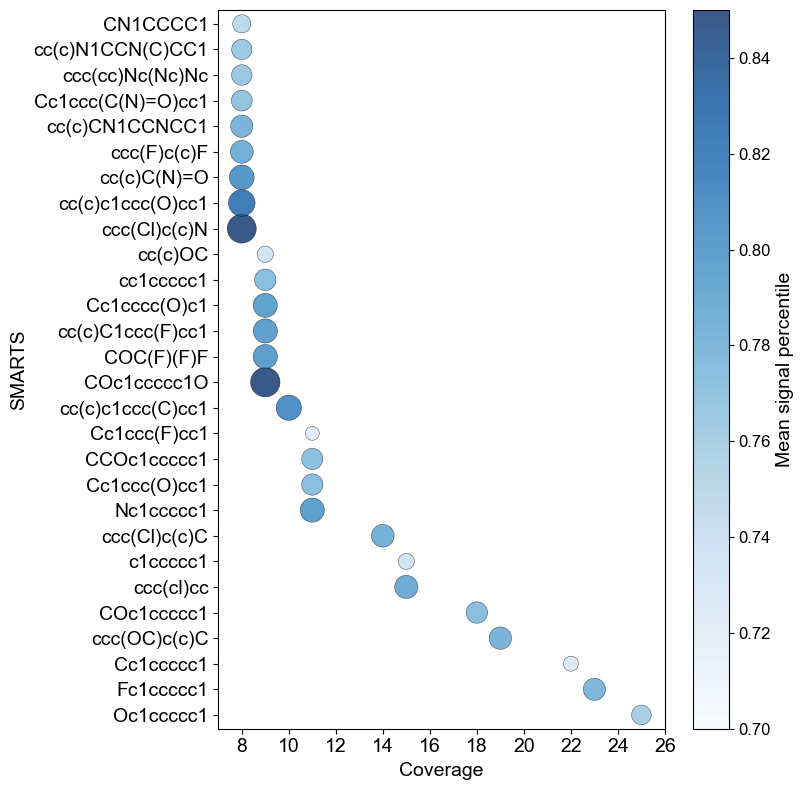

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
# 读取跨靶点汇总表
df = pd.read_csv("broad_from_alerts.csv")
# df['coverage'] = df['coverage'].astype(int)
# 选择前15个子结构（按 coverage+mean_signal_pct 排序）
top15 = (df.sort_values(["coverage","mean_signal_pct"], ascending=[False,False])
           )
# 设置气泡大小（根据 mean_signal_pct 缩放，乘以系数调整可视效果）
sizes = (top15["mean_signal_pct"] - top15["mean_signal_pct"].min()) / \
        (top15["mean_signal_pct"].max() - top15["mean_signal_pct"].min()) * 350 + 100  

# 创建气泡图
plt.figure(figsize=(8,8))

import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0.7, vmax=0.85)

scatter = plt.scatter(
    x=top15["coverage"],
    y=top15["smiles"],
    s=sizes, 
    c=top15["mean_signal_pct"],
    cmap="Blues",
    norm=norm,              # 设置颜色范围
    alpha=0.8, edgecolor="k", linewidths=0.3
)

cbar = plt.colorbar(scatter)
cbar.set_label("Mean signal percentile",fontsize=14)
cbar.ax.tick_params(labelsize=12)
# 颜色条
# cbar = plt.colorbar(scatter)
# cbar.set_label("Mean signal percentile (importance)")

plt.xlabel("Coverage",fontsize=14)
plt.ylabel("SMARTS",fontsize=14)
# plt.title("Broad Spectrum SMARTS (Bubble Plot)\nX=Coverage, Color=Importance, Size=Fixed")
plt.yticks(fontsize=14)
plt.xticks(
    range(int(top15["coverage"].min()), int(top15["coverage"].max())+2, 2),
    fontsize=14
)
# 收紧 y 轴上下空隙
plt.margins(y=0.02)   # 只保留 1% 边距

# 限制 x 范围
plt.xlim(top15["coverage"].min()-1, top15["coverage"].max()+1)

plt.tight_layout()
plt.savefig('气泡图.svg',dpi=300)
plt.show()

